In [138]:
import alpaca_trade_api as tradeapi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from scipy.signal import savgol_filter
from collections import deque

In [139]:
data = []
DATA_FOLDER_PATH = "DATA/AAPL"
for file in os.listdir(DATA_FOLDER_PATH):
    data.append(pd.read_csv(DATA_FOLDER_PATH + "/" + file))

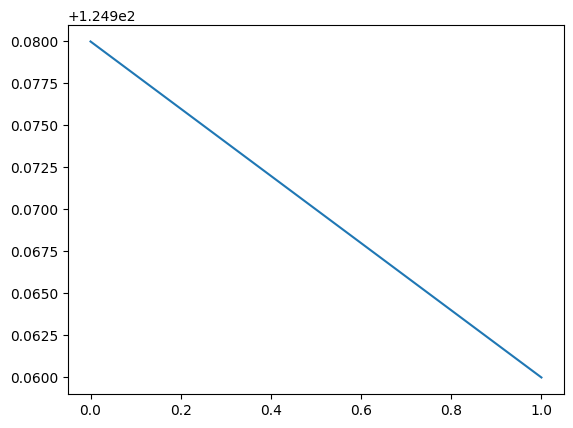

In [140]:
prices = data[1]['close']
times = data[1]['timestamp']
window = 2
RBT =  .006
RST = .006
MA_SUM = 0
MA_WINDOW = deque()
MA_ARR = []

for i in range(window):
    MA_WINDOW.append(prices[i])
    MA_SUM += prices[i]

plt.plot(MA_WINDOW)

In [141]:
buy_price = 0
sell_price = 0
sell_time = ""
buy_time = ""
HISTORY = []
num_trades = 0

MA_ARR.append(MA_SUM / window)

money = 1

ROC_ARR = []
for i in range(window, len(prices)):
    MA_SUM -= MA_WINDOW.popleft()
    MA_WINDOW.append(prices[i])
    MA_SUM += prices[i]
    MA_ARR.append(MA_SUM / window)

    ROC = MA_ARR[len(MA_ARR) - 1] - MA_ARR[len(MA_ARR) - 2]
    ROC_ARR.append(ROC) 

    if ROC > RBT and buy_price == 0:
        buy_price = prices[i]
        buy_time = times[i]

    if ROC < RST and buy_price != 0:
        sell_price = prices[i]
        sell_time = times[i]
        money *= sell_price / buy_price

        print("Trade no.", num_trades, "buy@:", buy_price, ",", buy_time, "sell@:", sell_price, ",", sell_time, "profit:", sell_price / buy_price)

        num_trades += 1
        buy_price = 0
print(money)


Trade no. 0 buy@: 124.98 , 2023-01-04 00:05:00+00:00 sell@: 124.97 , 2023-01-04 00:06:00+00:00 profit: 0.9999199871979516
Trade no. 1 buy@: 125.05 , 2023-01-04 00:21:00+00:00 sell@: 125.03 , 2023-01-04 00:23:00+00:00 profit: 0.9998400639744103
Trade no. 2 buy@: 125.05 , 2023-01-04 00:25:00+00:00 sell@: 125.09 , 2023-01-04 00:31:00+00:00 profit: 1.0003198720511797
Trade no. 3 buy@: 125.05 , 2023-01-04 00:35:00+00:00 sell@: 125.0 , 2023-01-04 00:37:00+00:00 profit: 0.9996001599360256
Trade no. 4 buy@: 125.02 , 2023-01-04 00:42:00+00:00 sell@: 125.0 , 2023-01-04 00:43:00+00:00 profit: 0.9998400255959047
Trade no. 5 buy@: 125.0 , 2023-01-04 00:47:00+00:00 sell@: 125.0 , 2023-01-04 00:50:00+00:00 profit: 1.0
Trade no. 6 buy@: 125.05 , 2023-01-04 00:55:00+00:00 sell@: 125.0 , 2023-01-04 00:58:00+00:00 profit: 0.9996001599360256
Trade no. 7 buy@: 126.34 , 2023-01-04 09:00:00+00:00 sell@: 126.18 , 2023-01-04 09:02:00+00:00 profit: 0.9987335760645877
Trade no. 8 buy@: 126.35 , 2023-01-04 09:04:

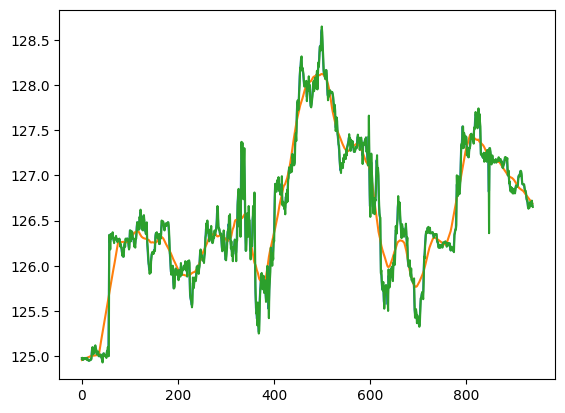

In [142]:
plt.plot(MA_ARR)
filtered = savgol_filter(MA_ARR, 40, 1)
plt.plot(filtered)
plt.plot(prices)